<div style="background-color:#ADD8E6">
<h3> Steps Taken </h3>
<p> 1. Extracting Data <br>
2. Defining Project Objective <br>
3. Data Description, Cleaning, and EDA <br>
4. MVP: Applying and Validating Algorithm <br>
5. Improving the Model <br>
6. Final Model <br>
7. Results </p>

In [1]:
# Libraries
import pandas as pd
import numpy as np
import glob

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

# Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# Prediction Model
from sklearn.cluster import KMeans

# Evaluation Metrics
#from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score
#from sklearn.metrics import pairwise_distances_argmin_min
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

# Parameters
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', None)

<div style="background-color:#ADD8E6">
<h3> 1. Extracting Data </h3>
<p> I previously treated the original survey-based data in Excel before moving over to Python. </p>

The dataset is based on in-situ surveys carried out in five counties in Northern Kenya in November 2022 organized by United Nations Office for the Coordination of Humanitarian Affairs (OCHA). In order to combine the datasets, I previously standardized in Excel the questions across the five surveys. Additionally, I deleted (majorily) empty columns, columns that don't exist across all five datasets, and columns with identical/highly similar information. I also divided columns with more than one data point per cell in the respective amount of individual cells. <br>

The original datasource: https://data.humdata.org/dataset/kenya-displacement-baseline-multi-sectoral-location-assessment-iom-dtm

In [2]:
# getting a list of all Excel file paths in the directory
excel_files = glob.glob('/Users/ingaeumann/Documents/LERNEN/DATA Sciences/IRONHACK/Final Project/displacement-and-mobility-northern-kenya/surveys/*.xlsx')

# initialising an empty list to store dataframes from each file
dataframes = []

# reading each Excel file into a dataframe and store it in the list
for file in excel_files:
    df = pd.read_excel(file, sheet_name = 1)
    # print("Column names for", file, ":", df.columns)  # Printing the column names
    dataframes.append(df)

# concatenating all dataframe in the list into a single dataframe
data = pd.concat(dataframes, ignore_index=True)

In [3]:
data.head()

,Date of Assessment,County,Sub-County,Type of Interview,Key responded Sex,Location Type,No. of Families/HHs in this sub location / Village unit,Are there absentees in the sub location/ village unit?,When did they leave the sub-location / village unit?,Number of Households,1st reason for departure,2nd reason for departure,3rd reason for departure,Are there Pastoralist drop out in the Sub location / village unit?,When did they drop the pastoral livestock production?,Number of Households 1,1st reason for dropping out,2nd reason for dropping out,3rd reason for dropping out,Are there Arrivals in the sub location/ village unit ?,When did they arrive in the sub-location / village?,Number of Households 2,Country majority arrived from (only for Kenyan National),"County from where, for majority","Sub-county from where, for majority",1st reason for departure from habitual residence,2nd reason for departure from habitual residence,3rd reason for departure from habitual residence,Are there Returnees in the sub location/village unit?,When did they arrive in the sub-location?,Number of Households 3,Country they returned from,"County they returned from, for majority",Sub-county they returned from for majority,1st reason for returning,2nd reason for returning,Where are the returnees living?,What is the first main livelihood options in your sub location?,What is the estimated no of households that depend on the first livelihood?,What is the second main livelihood options in your sub location?,What is the estimated no of households that depend on the second livelihood?,What is the third main livelihood options in your sub location?,What is the estimated no of households that depend on the third livelihood?,What are the challenges facing the sub location/ village unit in the last 1 year?,What are the challenges facing the sub location/ village unit in the last 1 year? 1,What are the challenges facing the sub location/ village unit in the last 1 year? 2,What are the Primary health concern in the sub location/ village unit?,What are the Primary health concern in the sub location/ village unit ? 1,What are the Primary health concern in the sub location/ village unit? 2,Is there a health facility in this sub location/ village unit?,"If there is a health facility, what is the main problem with the health service?",What is the structural status of the health facility?,What is the main water source for the farming and livestock rearing?,How many water sources are currently functional?,Where do most people of this settlement collect drinking water?,How long does it take to reach the nearest water source? (one-way),What is the average queue time for water?,What proportion of people in the sub location/ village unit have access water for drinking?,"What proportion of people in the sub location/village unit have access water for cooking, bathing and washing?",What problems do people face in accessing water?,Does the sub location/village unit have a water user committee (WASHCO)?,Who mainly supports the sub location/ village unit in maintaining the boreholes/taps/wells?,What problems does the community face when it comes to latrines?,What are the most common water treatment methods used,Is there an educational facility for children in this sub location/ village unit ?,Estimated number of students in the sub location/ village unit,Estimated number of school dropouts in the sub location/ village unit,What is the main safety concern with the current shelter?
0,2022-11-24 00:00:00,Marsabit,Moyale,Face-to-face interview,Male,Urban settlement or Town,1339.0,Yes,Before 2020,8.0,Ethinic Clashes,Resource-based conflict,NaN,Yes,2020 to 2022,3.0,Drought,Lack of water and pasture,NaN,Yes,Before 2020,7.0,Ethiopia,NaN,NaN,Ethinic Clashes,Resource-based conflict,Drought,Yes,NaN,2.0,Ethiopia,NaN,NaN,Wanted or needed to rejoin family,NaN,Host Community,Trade,200.0,Pastoralism,500.0,Employment (includes public and private sectors),1000.0,Environmental challenges,Safety and se

<div style="background-color:#ADD8E6">
<h3> 2. Defining Project Objective </h3>
<p> Based on the data I extracted from the web the following objective can be set. </p>

**“Analysing and Evaluating Mobility in Northern Kenya”**

The aim is to identify the key factors influencing mobility in the North of Kenya. And specifically observe the role droughts play in the region.
With a multi-feature target, the analysis is done by applying unsupervised learning.

BACKGROUND: The ASAL region of Kenya has endured three severe droughts in the last decade (2010-2011, 2016-2017 and 2020-2022). The most recent drought (2020 - 2022) has also been the most severe and longest with widespread livelihood losses and massive displacement of populations.

<div style="background-color:#ADD8E6">
<h3> 3. Data Description, Cleaning, and EDA </h3>
<p> Exploring and cleaning the data deeply is essential since my dataset is based on survey data. </p>

In [4]:
data.shape

(864, 68)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 68 columns):
 #   Column                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                          --------------  -----  
 0   Date of Assessment                                                                                              862 non-null    object 
 1   County                                                                                                          862 non-null    object 
 2   Sub-County                                                                                                      862 non-null    object 
 3   Type of Interview                                                                                               862 non-null    object 
 4   Key responded Sex                           

In [6]:
data.columns = data.columns.str.strip()
data.columns = data.columns.str.replace(' ', '_')
data.columns = data.columns.str.lower()
data.columns

Index(['date_of_assessment', 'county', 'sub-county', 'type_of_interview',
       'key_responded_sex', 'location_type',
       'no._of_families/hhs_in_this_sub_location_/_village_unit',
       'are_there_absentees_in_the_sub_location/_village_unit?',
       'when_did_they_leave_the_sub-location_/_village_unit?',
       'number_of_households', '1st_reason_for_departure',
       '2nd_reason_for_departure', '3rd_reason_for_departure',
       'are_there_pastoralist_drop_out_in_the_sub_location_/_village_unit?',
       'when_did_they_drop_the_pastoral_livestock_production?',
       'number_of_households_1', '1st_reason_for_dropping_out',
       '2nd_reason_for_dropping_out', '3rd_reason_for_dropping_out',
       'are_there_arrivals_in_the_sub_location/_village_unit_?',
       'when_did_they_arrive_in_the_sub-location_/_village?',
       'number_of_households_2',
       'country_majority_arrived_from_(only_for_kenyan_national)',
       'county_from_where,_for_majority',
       'sub-county_fro

**There is a number of columns that are not important for the defined objective:** <br>
- The characteristics of the person that was interviewed, the type of interview. <br>
- The county people arrived/returned from. Information on the sub-county is sufficient and more exact to observe and evaluate mobility. <br>
- The columns answering with a Yes/No whether people left or arrived in the location is also irrelevant, since there is another column stating the number of households that left/arrived. <br>
- For the analysis it is also irrelevant whether the arrivals/returnees are living in the host community or nearby, information on movements as well as reason(s) is sufficient.
- There is a number of columns dealing with pastoralism and access to drinking water in the region. Some of them factually deliver similar information, therefore a couple of them can be dropped without interfering with achieving the objective.
- The information on health can be reduced to concerns in order to tackle the objective.

In [7]:
data = data.drop(['type_of_interview', 'key_responded_sex', 'are_there_absentees_in_the_sub_location/_village_unit?', 'are_there_pastoralist_drop_out_in_the_sub_location_/_village_unit?', 'are_there_returnees_in_the_sub_location/village_unit?', 'are_there_arrivals_in_the_sub_location/_village_unit_?', 'when_did_they_arrive_in_the_sub-location?', 'county_from_where,_for_majority', 'county_they_returned_from,_for_majority', 'where_are_the_returnees_living?', 'what_problems_do_people_face_in_accessing_water?', 'what_is_the_main_water_source_for_the_farming_and_livestock_rearing?', 'where_do_most_people_of_this_settlement_collect_drinking_water?', 'does_the_sub_location/village_unit_have_a_water_user_committee_(washco)?', 'what_are_the_most_common_water_treatment_methods_used', 'who_mainly_supports_the_sub_location/_village_unit_in_maintaining_the_boreholes/taps/wells?', 'is_there_a_health_facility_in_this_sub_location/_village_unit?', 'if_there_is_a_health_facility,_what_is_the_main_problem_with_the_health_service?', 'what_is_the_structural_status_of_the_health_facility?', 'what_problems_does_the_community_face_when_it_comes_to_latrines?'], axis=1)

In [8]:
data = data.rename(columns={
    'date_of_assessment': 'assessment_date',
    'no._of_families/hhs_in_this_sub_location_/_village_unit': 'households_in_location',
    'when_did_they_leave_the_sub-location_/_village_unit?': 'departure_date',
    'number_of_households': 'households_departed',
    'when_did_they_drop_the_pastoral_livestock_production?': 'pastoralism_drop_date',
    'number_of_households_1': 'households_pastoralism_drop',
    '1st_reason_for_dropping_out': '1st_reason_to_drop',
    '2nd_reason_for_dropping_out': '2nd_reason_to_drop',
    '3rd_reason_for_dropping_out': '3rd_reason_to_drop',
    'when_did_they_arrive_in_the_sub-location_/_village?': 'arrival_date',
    'number_of_households_2': 'households_arrived',
    'country_majority_arrived_from_(only_for_kenyan_national)': 'country_arrived_from',
    'sub-county_from_where,_for_majority': 'sub-county_arrived_from',
    '1st_reason_for_departure_from_habitual_residence': '1st_reason_for_departure_from_origin',
    '2nd_reason_for_departure_from_habitual_residence': '2nd_reason_for_departure_from_origin',
    '3rd_reason_for_departure_from_habitual_residence': '3rd_reason_for_departure_from_origin',
    'number_of_households_3': 'households_returned',
    'country_they_returned_from': 'country_returned_from',
    'sub-county_they_returned_from_for_majority': 'sub-county_returned_from',
    'what_is_the_first_main_livelihood_options_in_your_sub_location?': 'livelihood_1',
    'what_is_the_estimated_no_of_households_that_depend_on_the_first_livelihood?': 'households_livelihood_1',
    'what_is_the_second_main_livelihood_options_in_your_sub_location?': 'livelihood_2',
    'what_is_the_estimated_no_of_households_that_depend_on_the_second_livelihood?': 'households_livelihood_2',
    'what_is_the_third_main_livelihood_options_in_your_sub_location?': 'livelihood_3',
    'what_is_the_estimated_no_of_households_that_depend_on_the_third_livelihood?': 'households_livelihood_3',
    'what_are_the_challenges_facing_the_sub_location/_village_unit_in_the_last_1_year?': '1st_challenge',
    'what_are_the_challenges_facing_the_sub_location/_village_unit_in_the_last_1_year?_1': '2nd_challenge',
    'what_are_the_challenges_facing_the_sub_location/_village_unit_in_the_last_1_year?_2': '3rd_challenge',
    'what_are_the_primary_health_concern_in_the_sub_location/_village_unit?': '1st_health_concern',
    'what_are_the_primary_health_concern_in_the_sub_location/_village_unit_?_1': '2nd_health_concern',
    'what_are_the_primary_health_concern_in_the_sub_location/_village_unit?_2': '3rd_health_concern',
    'how_many_water_sources_are_currently_functional?': 'functional_watersources',
    'how_long_does_it_take_to_reach_the_nearest_water_source?_(one-way)': 'watersource_distance',
    'what_is_the_average_queue_time_for_water?': 'water_queue_time',
    'what_proportion_of_people_in_the_sub_location/_village_unit_have_access_water_for_drinking?': 'percent_drinkingwater_access',
    'what_proportion_of_people_in_the_sub_location/village_unit_have_access_water_for_cooking,_bathing_and_washing?': 'percent_cookingwater_access',
    'is_there_an_educational_facility_for_children_in_this_sub_location/_village_unit_?': 'educational_facility',
    'estimated_number_of_students_in_the_sub_location/_village_unit': 'students',
    'estimated_number_of_school_dropouts_in_the_sub_location/_village_unit': 'school_dropouts',
    'what_is_the_main_safety_concern_with_the_current_shelter?': 'safety_concerns'
})
# data.columns

In [9]:
# reordering columns for better logic
data = data[['assessment_date', 'county', 'sub-county', 'location_type', 'households_in_location', 'households_departed',
             'departure_date', '1st_reason_for_departure', '2nd_reason_for_departure','3rd_reason_for_departure', 'households_pastoralism_drop',
             'pastoralism_drop_date', '1st_reason_to_drop', '2nd_reason_to_drop', '3rd_reason_to_drop', 'households_arrived', 'arrival_date',
             'country_arrived_from', 'sub-county_arrived_from', '1st_reason_for_departure_from_origin', '2nd_reason_for_departure_from_origin',
             '3rd_reason_for_departure_from_origin', 'households_returned', 'country_returned_from', 'sub-county_returned_from', '1st_reason_for_returning', '2nd_reason_for_returning',
             'livelihood_1', 'households_livelihood_1', 'livelihood_2', 'households_livelihood_2', 'livelihood_3', 'households_livelihood_3', '1st_challenge',
             '2nd_challenge', '3rd_challenge', '1st_health_concern', '2nd_health_concern', '3rd_health_concern', 'functional_watersources', 
             'watersource_distance', 'water_queue_time', 'percent_drinkingwater_access', 'percent_cookingwater_access', 
             'educational_facility', 'students', 'school_dropouts', 'safety_concerns']]
# data.head(10)

In [10]:
data.shape

(864, 48)

In [11]:
# checking for duplicates
duplicates = data[data.duplicated(keep=False)]
duplicates

,assessment_date,county,sub-county,location_type,households_in_location,households_departed,departure_date,1st_reason_for_departure,2nd_reason_for_departure,3rd_reason_for_departure,households_pastoralism_drop,pastoralism_drop_date,1st_reason_to_drop,2nd_reason_to_drop,3rd_reason_to_drop,households_arrived,arrival_date,country_arrived_from,sub-county_arrived_from,1st_reason_for_departure_from_origin,2nd_reason_for_departure_from_origin,3rd_reason_for_departure_from_origin,households_returned,country_returned_from,sub-county_returned_from,1st_reason_for_returning,2nd_reason_for_returning,livelihood_1,households_livelihood_1,livelihood_2,households_livelihood_2,livelihood_3,households_livelihood_3,1st_challenge,2nd_challenge,3rd_challenge,1st_health_concern,2nd_health_concern,3rd_health_concern,functional_watersources,watersource_distance,water_queue_time,percent_drinkingwater_access,percent_cookingwater_access,educational_facility,students,school_dropouts,safety_concerns


In [12]:
# checking for NaNs
data.isna().sum()

assessment_date                           2
county                                    2
sub-county                                2
location_type                             2
households_in_location                    2
households_departed                     109
departure_date                          153
1st_reason_for_departure                153
2nd_reason_for_departure                370
3rd_reason_for_departure                538
households_pastoralism_drop              36
pastoralism_drop_date                    55
1st_reason_to_drop                       55
2nd_reason_to_drop                      141
3rd_reason_to_drop                      302
households_arrived                      100
arrival_date                            190
country_arrived_from                    189
sub-county_arrived_from                 233
1st_reason_for_departure_from_origin    190
2nd_reason_for_departure_from_origin    413
3rd_reason_for_departure_from_origin    541
households_returned             

First, I deal with the date column and unify format.

In [13]:
data.dropna(subset=['assessment_date'], inplace=True)

In [14]:
data['assessment_date'].unique()

array([Timestamp('2022-11-24 00:00:00'), Timestamp('2022-11-26 00:00:00'),
       Timestamp('2022-11-23 00:00:00'), Timestamp('2022-11-22 00:00:00'),
       Timestamp('2022-11-21 00:00:00'), Timestamp('2022-11-25 00:00:00'),
       Timestamp('2022-11-28 00:00:00'), Timestamp('2022-11-27 00:00:00'),
       Timestamp('2022-11-29 00:00:00'), Timestamp('2022-12-01 00:00:00'),
       Timestamp('2022-11-30 00:00:00'), '2023-01-16', '2023-01-17',
       '2023-01-18', '2023-01-19', '2023-01-20', '2023-01-21',
       '2023-01-22', '2023-01-23', '2023-01-24', '2023-01-25',
       '2023-01-26', '2023-01-27', '2023-01-28',
       Timestamp('2022-10-26 00:00:00'), Timestamp('2022-10-27 00:00:00'),
       Timestamp('2022-10-28 00:00:00'), Timestamp('2022-10-29 00:00:00'),
       Timestamp('2022-10-30 00:00:00'), Timestamp('2022-10-24 00:00:00'),
       Timestamp('2022-10-31 00:00:00'), Timestamp('2022-11-01 00:00:00'),
       Timestamp('2022-11-02 00:00:00'), Timestamp('2022-11-13 00:00:00'),
      

In [15]:
# turning all rows into timestamp format
data['assessment_date'] = pd.to_datetime(data['assessment_date'])
# extracting only the date from each timestamp
data['assessment_date'] = data['assessment_date'].dt.date

Since I want to analyse the key mobility drivers in the region and the dataset is restricted to the North of Kenya, NaNs in location-related features don't concern me, I replace them with '0ther'. But only after dealing with missing values in arrival, departure, or pastoralism drop date (indicating whether before or as a consequence of the intense drought from 2020-2022). Having in mind that here NaNs simply indicate no departures/pastoralism drop/arrival/return, I will replace those NaNs in all related features with '0'. Lastly, there is a couple additional rows that are missing data related to the movement features, here I will impute the mode to replace the NaNs. <br>

Most relevant are high amount of NaNs in features related to motivational and circumstancial factors such as reasons to move, challenges, health concerns, water access, etc. Missing reasons I will replace proportionally by existing categories of the same column to not change the distribution of the data. <br>

Problem is that even though survey questions were identical, in one of the counties (Garissa with 356 entries) only about 50% of them were asked/answered by the questionees. I do not want to loose these entries to have a complete picture of the region and to not reduce the dataset too much avoiding overfitting. Also to deal with the missing data from the survey carried out in Garissa county I will use proportional assignation. They can be predicted reasonably well by the data from other counties since the 5 counties face highly similar challenges.

In [16]:
# data.isna().sum()

In [17]:
# filling NaNs in dates of departure etc. with '0' if there were no households departing etc.
data.loc[data['households_departed'].isna(), ['departure_date', '1st_reason_for_departure', '2nd_reason_for_departure', '3rd_reason_for_departure']] = '0'
data['households_departed'].fillna(0, inplace=True)
data.loc[data['households_pastoralism_drop'].isna(), ['pastoralism_drop_date', '1st_reason_to_drop', '2nd_reason_to_drop', '3rd_reason_to_drop']] = '0'
data['households_pastoralism_drop'].fillna(0, inplace=True)
data.loc[data['households_arrived'].isna(), ['arrival_date', 'country_arrived_from', 'sub-county_arrived_from', '1st_reason_for_departure_from_origin', '2nd_reason_for_departure_from_origin', '3rd_reason_for_departure_from_origin']] = '0'
data['households_arrived'].fillna(0, inplace=True)
data.loc[data['households_returned'].isna(), ['country_returned_from', 'sub-county_returned_from', '1st_reason_for_returning', '2nd_reason_for_returning']] = '0'
data['households_returned'].fillna(0, inplace=True)

In [18]:
data['1st_reason_for_departure'].unique()

array(['Ethinic Clashes', 'Drought', nan, 'Other',
       'Resource-based conflict', '0', 'Ethinic_Clashes',
       'Resource-based_conflict', 'Flash_floods_or_seasonal_floods',
       'Flash floods or seasonal floods'], dtype=object)

In [19]:
# replacing remaining empty values in location related columns with 'Other'
columns_to_fill = ['country_arrived_from', 'sub-county_arrived_from',
                   'country_returned_from', 'sub-county_returned_from']

for column in columns_to_fill:
    data[column].fillna('Other', inplace=True)

In [20]:
data['departure_date'].unique()

array(['Before 2020', '2020 to 2022', nan, '0', 'Before_2020',
       '2020_to_2022'], dtype=object)

In [21]:
data['pastoralism_drop_date'].unique()

array(['2020 to 2022', 'Before 2020', nan, '2020_to_2022', 'Before_2020',
       '0'], dtype=object)

In [22]:
data['arrival_date'].unique()

array(['Before 2020', '2020 to 2022', nan, 'Before_2020', '2020_to_2022',
       '0'], dtype=object)

In [23]:
# filling the remaining NaNs with the mode
data['departure_date'].fillna(data['departure_date'].mode()[0], inplace=True)
data['departure_date'] = data['departure_date'].replace({'Before_2020': 'Before 2020', '2020_to_2022': '2020 to 2022'})
data['pastoralism_drop_date'].fillna(data['pastoralism_drop_date'].mode()[0], inplace=True)
data['pastoralism_drop_date'] = data['pastoralism_drop_date'].replace({'Before_2020': 'Before 2020', '2020_to_2022': '2020 to 2022'})
data['arrival_date'].fillna(data['arrival_date'].mode()[0], inplace=True)
data['arrival_date'] = data['arrival_date'].replace({'Before_2020': 'Before 2020', '2020_to_2022': '2020 to 2022'})
data['arrival_date'].unique()

array(['Before 2020', '2020 to 2022', '0'], dtype=object)

In [24]:
data['3rd_reason_to_drop'].value_counts()

Other                              192
Banditry                           100
Lack of water and pasture           95
Resource-based_conflict             52
Animal Disease                      37
Flash_floods_or_seasonal_floods     35
0                                   34
Drought                             27
Lack_of_water_and_pasture           14
Animal_Disease                       5
Fires                                5
Name: 3rd_reason_to_drop, dtype: int64

In [25]:
# turning 'Other' and '0' in NaNs, then taking a random sample of non-NaN values of size equal to number of NaNs and assign them randomly to fill the NaNs
def fillna_with_proportional_random(df, column):
    df[column].replace(['Other', '0'], np.nan, inplace=True) # replace 'Other' and '0' with NaNs
    random_sample = df[column].dropna().sample(df[column].isnull().sum(), replace=True)
    random_sample.index = df[df[column].isnull()].index # resetting index
    df.loc[df[column].isnull(), column] = random_sample

columns_to_fill = [
    '1st_reason_for_departure', '2nd_reason_for_departure', '3rd_reason_for_departure', 
    '1st_reason_to_drop', '2nd_reason_to_drop', '3rd_reason_to_drop',
    '1st_reason_for_departure_from_origin', '2nd_reason_for_departure_from_origin', '3rd_reason_for_departure_from_origin',
    '1st_reason_for_returning', '2nd_reason_for_returning'
]

for column in columns_to_fill:
    fillna_with_proportional_random(data, column)

In [26]:
data['3rd_reason_to_drop'].value_counts()

Banditry                           246
Lack of water and pasture          212
Resource-based_conflict            123
Animal Disease                      93
Flash_floods_or_seasonal_floods     79
Drought                             57
Lack_of_water_and_pasture           30
Fires                               13
Animal_Disease                       9
Name: 3rd_reason_to_drop, dtype: int64

Now, I am checking categories in all of the categorical columns for unification and before applying any imputation method to fill NaNs.

In [27]:
data['county'].unique()
# data['sub-county'].unique()
# data['location_type'].unique()
# data['1st_reason_for_departure'].unique()
# data['2nd_reason_for_departure'].unique()
# data['3rd_reason_for_departure'].unique()
# data['1st_reason_to_drop'].unique()
# data['2nd_reason_to_drop'].unique()
# data['3rd_reason_to_drop'].unique()
# data['country_arrived_from'].unique()
# data['sub-county_arrived_from'].unique()
# data['1st_reason_for_departure_from_origin'].unique()
# data['2nd_reason_for_departure_from_origin'].unique()
# data['3rd_reason_for_departure_from_origin'].unique()
# data['country_returned_from'].unique()
# data['sub-county_returned_from'].unique()# data['1st_reason_for_returning'].unique()
# data['2nd_reason_for_returning'].unique()
# data['livelihood_1'].unique()
# data['livelihood_2'].unique()
# data['livelihood_3'].unique()
# data['1st_challenge'].unique()
# data['2nd_challenge'].unique()
# data['3rd_challenge'].unique()
# data['1st_health_concern'].unique()
# data['2nd_health_concern'].unique()
# data['3rd_health_concern'].unique()
# data['watersource_distance'].unique()
# data['water_queue_time'].unique()
# data['percent_drinkingwater_access'].unique()
# data['percent_cookingwater_access'].unique()
# data['educational_facility'].unique()
# data['safety_concerns'].unique() 

array(['Marsabit', 'Samburu', 'Isiolo', 'Turkana', 'Garissa'],
      dtype=object)

Almost all the categorical columns have misspelling, differing spelling and unclear categories. I unify.

In [28]:
def clean_category(cat):
    if isinstance(cat, str):
        if cat in ['0', 'Ethinic Clashes', 'Ethinic_Clashes']:
            if cat == '0':
                return 'Other'
            else:
                return 'Ethnic Clashes'
        else:
            return cat.replace('_', ' ').title()
    else:
        return cat  # returning NaN as is

# dropping date related columns where I want to keep the '0'
data_temp = data.drop(columns=['departure_date', 'pastoralism_drop_date', 'arrival_date'])

categorical_columns = data_temp.select_dtypes(include=['object']).columns

for column in categorical_columns:
    data[column] = data[column].map(clean_category)

In [29]:
# data['departure_date'].unique()

The categories of categorical columns are unified now. I proceed with imputation.

In [30]:
# data.isna().sum()

In [31]:
# separating Garissa and other county data
data_garissa = data[data['county'] == 'Garissa']
data_non_garissa = data[data['county'] != 'Garissa']

# filtering rows with NaNs in Garissa county data
data_garissa_nan = data_garissa[data_garissa.isna().any(axis=1)]

# for each row with NaN in the Garissa dataset, finding a similar row in the non-Garissa dataset and use it to fill NaNs.
for i in data_garissa_nan.index:
    similarities = data_non_garissa.apply(lambda row: (row == data_garissa_nan.loc[i]).mean(), axis=1)
    most_similar_index = similarities.idxmax()
    data_garissa_nan.loc[i] = data_garissa_nan.loc[i].fillna(data_non_garissa.loc[most_similar_index])

# concatenating the imputed and non-imputed Garissa data
data_garissa_filled = pd.concat([data_garissa_nan, data_garissa.dropna()], axis=0)

In [32]:
# concatenating the two datasets
data_cleaned = pd.concat([data_garissa_filled, data_non_garissa])

I change a couple of categorical columns to numerical since their content is of numerical nature only expressed in words.

In [33]:
# writing a dictionary for the value replacement
watersource_distance_dict = {
    '21-30 Minute Walk': 25.5,
    '31-45 Minute Walk': 38,
    'More Than 45-Minute Walk': 50,
    'Less Than 20-Minute Walk': 10,
    np.nan: np.nan
}

water_queue_time_dict = {
    'Less Than 20-Minute': 10,
    '21-30 Minute': 25.5,
    'More Than 45-Minute': 50,
    '31-45 Minute': 38,
    np.nan: np.nan
}

percentage_dict = {
    'About Half Around 50Pc': 50,
    'A Few Around 25Pc': 25,
    'Most Around 75Pc': 75,
    'Everyone Around 100Pc': 100,
    'Nobody Around 0Pc': 0,
    'Dont Know': np.nan,
    np.nan: np.nan
}

# replacing the values in the columns
data_cleaned['watersource_distance'] = data_cleaned['watersource_distance'].map(watersource_distance_dict)
data_cleaned['water_queue_time'] = data_cleaned['water_queue_time'].map(water_queue_time_dict)
data_cleaned['percent_drinkingwater_access'] = data_cleaned['percent_drinkingwater_access'].map(percentage_dict)
data_cleaned['percent_cookingwater_access'] = data_cleaned['percent_cookingwater_access'].map(percentage_dict)

Now I look at the numerical columns. I turn float into int, since there are no half households, students, watersources...

In [34]:
numerical_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    # handeling missing values
    data_cleaned[col] = data_cleaned[col].fillna(0)
    # rounding to the nearest integer
    data_cleaned[col] = data_cleaned[col].round()
    # converting to integer
    data_cleaned[col] = data_cleaned[col].astype(int)

In [35]:
data_cleaned.isna().sum()

assessment_date                           0
county                                    0
sub-county                                0
location_type                             0
households_in_location                    0
households_departed                       0
departure_date                            0
1st_reason_for_departure                  0
2nd_reason_for_departure                  0
3rd_reason_for_departure                  0
households_pastoralism_drop               0
pastoralism_drop_date                     0
1st_reason_to_drop                        0
2nd_reason_to_drop                        0
3rd_reason_to_drop                        0
households_arrived                        0
arrival_date                              0
country_arrived_from                      0
sub-county_arrived_from                   0
1st_reason_for_departure_from_origin      0
2nd_reason_for_departure_from_origin      0
3rd_reason_for_departure_from_origin      0
households_returned             

There are now a couple of NaNs remaining since some interviewees did not voice a second or third concern on challenges or health. I try two different approaches to deal with these NaNs and compare the results. <br>
First approach: For all 4 columns, I assign a category (answer) to these NaNs proportionally based on the rest of the categories of the respective column. <br>
Second approach: I drop the two columns with most missing answers `3rd_challenge`and `3rd_health_concern`, since they simply might be of less importance and only assign randomly in the other two.

I prefer both these approaches over dropping all rows with NaNs, meaning about one quarter of my dataset.

In [36]:
# using the earlier defined function `fillna_with_proportional_random(data, column)`
columns_to_fill = ['2nd_challenge', '3rd_challenge', '2nd_health_concern', '3rd_health_concern']

for column in columns_to_fill:
    fillna_with_proportional_random(data_cleaned, column)

In [37]:
# data_cleaned = data_cleaned.drop(['3rd_challenge', '3rd_health_concern'], axis=1)

# columns_to_fill = ['2nd_challenge', '2nd_health_concern']

# for column in columns_to_fill:
    # fillna_with_proportional_random(data_cleaned, column)

While k = 4 is the best number of clusters for both approaches (based on SilhouetteVisualizer and KElbowVisualizer). The first approach results in much more defined clusters, meanwhile the second approach results for all k > 3 in one extremely narrow/small cluster (see screenshot below). I choose the first approach.
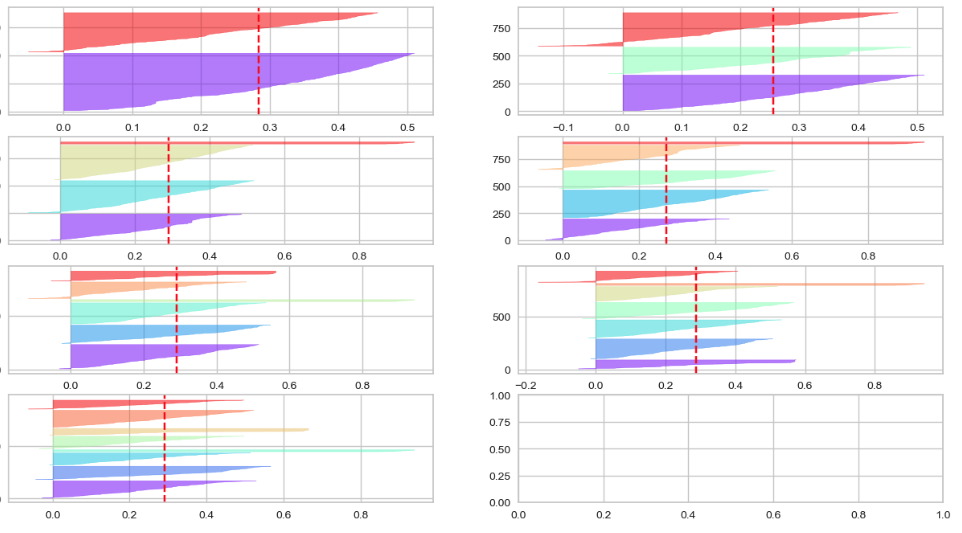

In [38]:
data_cleaned.isna().sum()

assessment_date                         0
county                                  0
sub-county                              0
location_type                           0
households_in_location                  0
households_departed                     0
departure_date                          0
1st_reason_for_departure                0
2nd_reason_for_departure                0
3rd_reason_for_departure                0
households_pastoralism_drop             0
pastoralism_drop_date                   0
1st_reason_to_drop                      0
2nd_reason_to_drop                      0
3rd_reason_to_drop                      0
households_arrived                      0
arrival_date                            0
country_arrived_from                    0
sub-county_arrived_from                 0
1st_reason_for_departure_from_origin    0
2nd_reason_for_departure_from_origin    0
3rd_reason_for_departure_from_origin    0
households_returned                     0
country_returned_from             

In [39]:
# dropping the last NaN row remaining
data_cleaned.dropna(inplace=True)

In [40]:
data_cleaned.shape

(861, 48)

In [41]:
data_cleaned.head()

,assessment_date,county,sub-county,location_type,households_in_location,households_departed,departure_date,1st_reason_for_departure,2nd_reason_for_departure,3rd_reason_for_departure,households_pastoralism_drop,pastoralism_drop_date,1st_reason_to_drop,2nd_reason_to_drop,3rd_reason_to_drop,households_arrived,arrival_date,country_arrived_from,sub-county_arrived_from,1st_reason_for_departure_from_origin,2nd_reason_for_departure_from_origin,3rd_reason_for_departure_from_origin,households_returned,country_returned_from,sub-county_returned_from,1st_reason_for_returning,2nd_reason_for_returning,livelihood_1,households_livelihood_1,livelihood_2,households_livelihood_2,livelihood_3,households_livelihood_3,1st_challenge,2nd_challenge,3rd_challenge,1st_health_concern,2nd_health_concern,3rd_health_concern,functional_watersources,watersource_distance,water_queue_time,percent_drinkingwater_access,percent_cookingwater_access,educational_facility,students,school_dropouts,safety_concerns
508,2022-09-12,Garissa,Balambala,Village,230,25,2020 to 2022,Drought,Resource-Based Conflict,Resource-Based Conflict,90,2020 to 2022,Drought,Resource-Based Conflict,Banditry,15,2020 to 2022,Kenya,Lagdera,Drought,Resource-Based Conflict,Ethnic Clashes,10,Kenya,Lagdera,Drought,Resource-Based Conflict,Pastoralism,200,Trade,93,Other,65,Resource Based Conflict,Lack Of Food And Water,Safety And Security,Diarrhea,Malaria,Typhoid,2,50,26,25,25,Yes,867,20,Weather
509,2022-09-13,Garissa,Balambala,Village,35,31,2020 to 2022,Drought,Resource-Based Conflict,Flash Floods Or Seasonal Floods,27,2020 to 2022,Drought,Resource-Based Conflict,Lack Of Water And Pasture,40,2020 to 2022,Kenya,Lagdera,Drought,Resource-Based Conflict,Resource-Based Conflict,15,Kenya,Lagdera,Drought,Resource-Based Conflict,Pastoralism,260,Trade,6,Employment (Includes Public And Private Sectors),3,Loss Of Livelihood,Lack Of Food And Water,Lack Of Access To Essential Services,Other,Acute Malnutrition,Diarrhea,1,26,26,50,50,No,14,79,Other
510,2022-09-12,Garissa,Ijara,Village,400,10,2020 to 2022,Drought,Resource-Based Conflict,Flash Floods Or Seasonal Floods,1000,2020 to 2022,Drought,Resource-Based Conflict,Resource-Based Conflict,190,2020 to 2022,Kenya,Lamu/West,Drought,Resource-Based Conflict,Ethnic Clashes,500,Kenya,Lamu/West,Drought,Resource-Based Conflict,Pastoralism,260,Trade,6,Employment (Includes Public And Private Sectors),3,Loss Of Livelihood,Lack Of Food And Water,Lack Of Access To Essential Services,Other,Pneumonia,Amoeba,1,26,26,50,50,No,14,79,Other
511,2022-09-16,Garissa,Fafi,Village,200,30,2020 to 2022,Drought,Resource-Based Conflict,Flash Floods Or Seasonal Floods,30,2020 to 2022,Drought,Resource-Based Conflict,Flash Floods Or Seasonal Floods,50,2020 to 2022,Kenya,Lagdera,Drought,Resource-Based Conflict,Flash Floods Or Seasonal Floods,40,Kenya,Fafi,Drought,Resource-Based Conflict,Pastoralism,400,Trade,50,Employment (Includes Public And Private Sectors),15,Loss Of Livelihood,Environmental Challenges,Lack Of Food And Water,Malaria,Measles,Diarrhea,1,38,26,75,50,Yes,245,20,Weather
512,2022-09-16,Garissa,Fafi,Village,200,100,2020 to 2022,Drought,Resource-Based Conflict,Flash Floods Or Seasonal Floods,50,2020 to 2022,Drought,Resource-Based Conflict,Flash Floods Or Seasonal Floods,50,2020 to 2022,Kenya,Fafi,Drought,Resource-Based Conflict,Flash Floods Or Seasonal Floods,50,Kenya,Fafi,Drought,Resource-Based Conflict,Pastoralism,229,Trade,50,Other,179,Loss Of Livelihood,Safety And Security,Environmental Challenges,Malaria,Pneumonia,Typhoid,1,50,50,75,75,Yes,4,5,Weather


In [42]:
data_cleaned.to_csv('data_cleaned.csv')

<div style="background-color:#ADD8E6">
<h3> 4. Applying and Validating the Algorithm </h3>
<p> For comparison, I apply clustering without and with previously scaling the features. For both datasets I try number of clusters between 2 and 9. </p>

In [43]:
# selecting the columns that most likely are drivers for mobility in the region

# categorical columns to convert
cat_cols = [
    '1st_reason_for_departure', '2nd_reason_for_departure', '3rd_reason_for_departure', 
    '1st_reason_to_drop', '2nd_reason_to_drop', '3rd_reason_to_drop', 
    '1st_reason_for_departure_from_origin', '2nd_reason_for_departure_from_origin', 
    '3rd_reason_for_departure_from_origin',
    '1st_reason_for_returning', '2nd_reason_for_returning',
    '1st_challenge', '2nd_challenge', '3rd_challenge',
    '1st_health_concern', '2nd_health_concern', '3rd_health_concern', 
    'safety_concerns', 'educational_facility'
]

# numerical columns
num_cols = ['functional_watersources', 'watersource_distance', 'water_queue_time', 
            'percent_drinkingwater_access', 'percent_cookingwater_access']

# creating a dictionary to store the encoders & applying Label Encoder to categorical columns
encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    data_cleaned[col] = le.fit_transform(data_cleaned[col])
    encoders[col] = le

# concatenating categorical and numerical features
drivers = pd.concat([data_cleaned[cat_cols], data_cleaned[num_cols]], axis=1)

# scaling the data for better performance of the model
scaler = StandardScaler()
drivers_scaled = scaler.fit_transform(drivers)

# running KMeans
kmeans = KMeans(n_clusters=4, random_state=42).fit(drivers_scaled)
clusters = kmeans.predict(drivers_scaled)

# calculating silhouette score
score = silhouette_score(drivers_scaled, kmeans.labels_, metric='euclidean')
print("Silhouette score:", score)

Silhouette score: 0.06723584579727894


The obtained silhouette score is quite close to zero. This suggests that the data points might be very close to the decision boundary between two neighboring clusters. In other words, the clustering might not be distinctly separated, and there might be some overlap among clusters.

In [44]:
# data = not scaled, k = 4, plot 2d

# kmeans = KMeans(n_clusters=5, random_state=42).fit(drivers)
# clusters = kmeans.predict(drivers)

# labels = np.unique(clusters)

# colors = cm.rainbow(np.linspace(0, 1, len(labels)))

# for i, color in zip(labels, colors):
    # plt.scatter(drivers[clusters == i , 0], 
                # drivers[clusters == i , 1], 
                # color=color,
                # label=i)
    
# plt.legend()
# plt.show()

Clustering and displaying the non-scaled data is impossible.

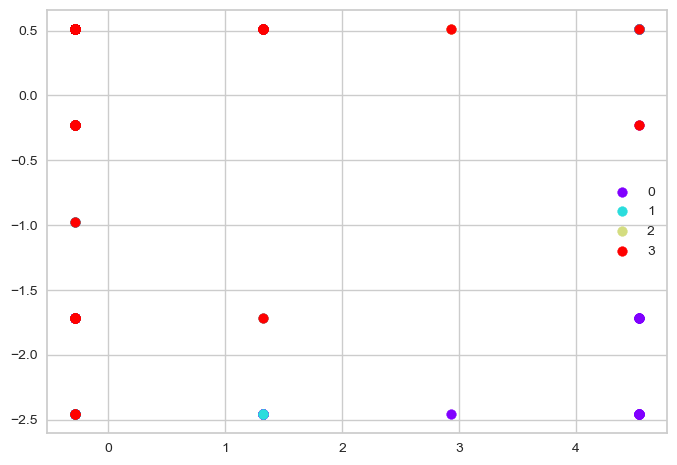

In [45]:
# data = scaled, k = 4, plot = 2d 

labels = np.unique(clusters)

colors = cm.rainbow(np.linspace(0, 1, len(labels)))

for i, color in zip(labels, colors):
    plt.scatter(drivers_scaled[clusters == i , 0], 
                drivers_scaled[clusters == i , 1], 
                color=color,
                label=i)
    
plt.legend()
plt.show()

Clustering and displying the scaled data does not look good (see above). Most likely due to the large amount of features I selected. I apply PCA to reduce the features. 

<div style="background-color:#ADD8E6">
<h3> 5. Improving the Model </h3>
<p> I want to achieve well separated clusters. </p>

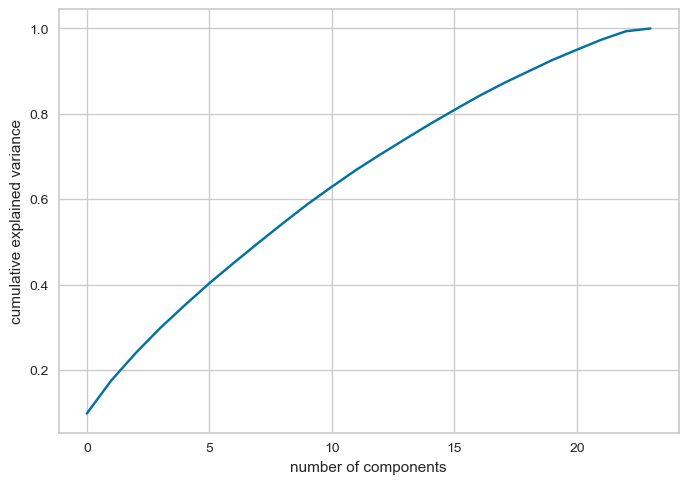

In [46]:
# checking the variance ratio to find the best number of PCA 
pca = PCA().fit(drivers_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

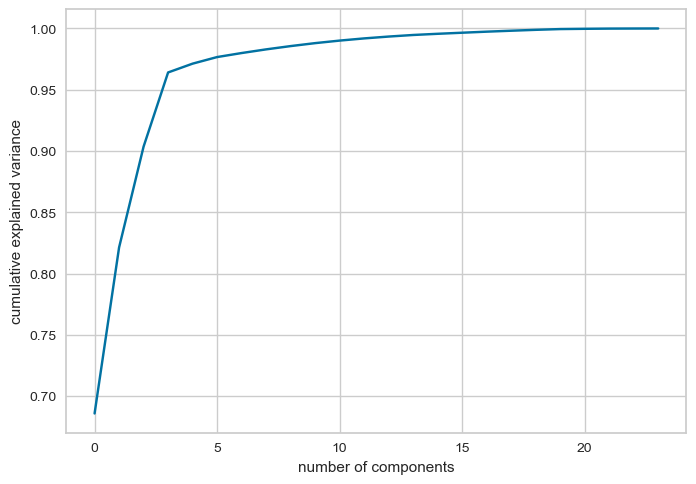

In [47]:
pca = PCA().fit(drivers)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

For the scaled data the PCA variance ratio does not provide any specific number of components to be applied. For the unscaled data and any number of clusters between 2 and 9 the best number of PCAs is 3. Hence I chose 3 also for the scaled data.

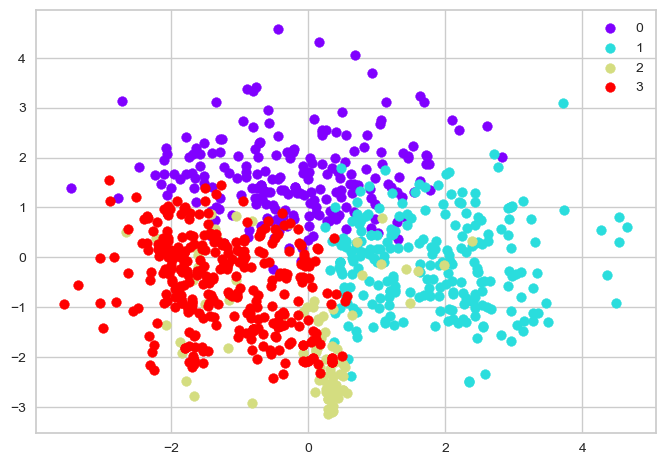

In [48]:
# data = scaled, k = 4, PCA-components = 3, plot = 2d 

pca = PCA(n_components=3)
reduced_drivers = pca.fit_transform(drivers_scaled)

labels = np.unique(clusters)

colors = cm.rainbow(np.linspace(0, 1, len(labels)))

for i, color in zip(labels, colors):
    plt.scatter(reduced_drivers[clusters == i , 0], 
                reduced_drivers[clusters == i , 1], 
                color=color,
                label=i)
    
plt.legend()
plt.show()

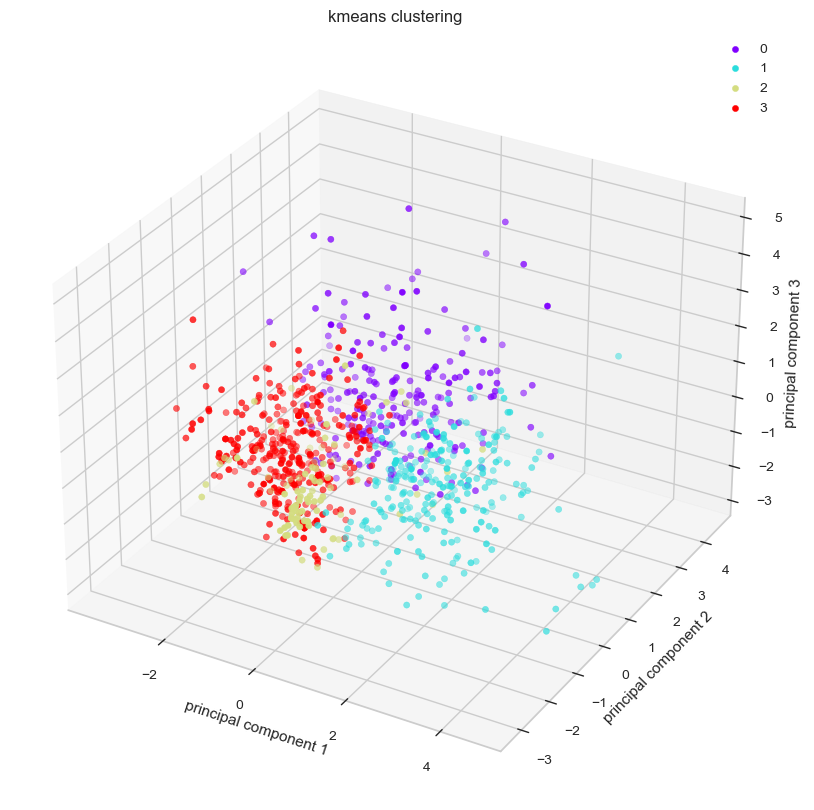

In [49]:
# data = scaled, k = 4, PCA-components = 3, plot = 3d 

pca = PCA(n_components=3)
reduced_drivers = pca.fit_transform(drivers_scaled)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

labels = np.unique(clusters)

# create a color map with enough colors
colors = cm.rainbow(np.linspace(0, 1, len(labels)))

for i, color in zip(labels, colors):
    ax.scatter(reduced_drivers[clusters == i , 0], 
               reduced_drivers[clusters == i , 1], 
               reduced_drivers[clusters == i , 2], 
               color=color,
               label = i)
    
plt.legend()
ax.set_title('kmeans clustering')
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
ax.set_zlabel('principal component 3')
plt.show()

Based on the scatter plots after PCA, clusters = 4 or 5 appear to be the best. Let's confirm with the SilhouetteVisualizer.

In [59]:
score = silhouette_score(reduced_drivers, kmeans.labels_, metric='euclidean')
print("Silhouette score:", score)

Silhouette score: 0.16399641598669953


The silhouette score is higher than the previous one, which indicates an improvement in the clustering algorithm. The silhouette score is closer to 1 than it is to -1, which means the samples are more likely far away from the neighboring clusters.
But as observed in the visualisations above there are overlaps of the distinct clusters. Given the nature of the data, this has to be the case, since there are similar answers to differing questions across the survey. In many real-world datasets, particularly those involving human responses such as surveys, overlaps and less clear distinctions are not uncommon.  

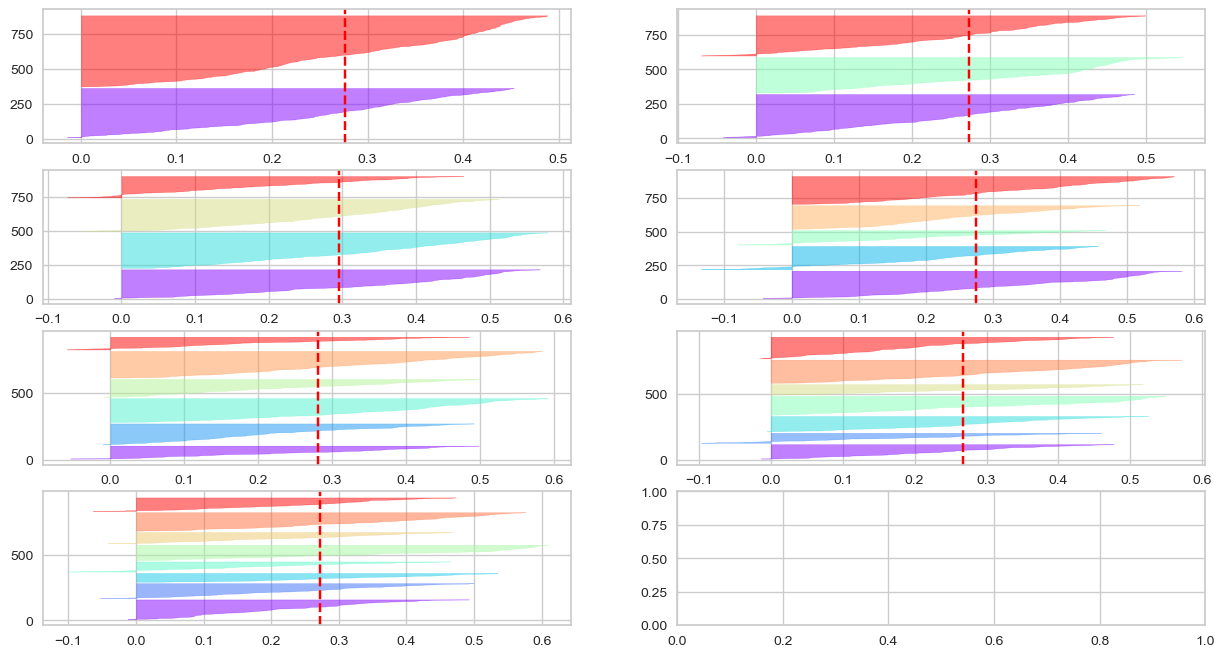

In [50]:
# data = scaled, k = 2-9, PCA-components = 3

fig, ax = plt.subplots(4, 2, figsize=(15, 8))

k_values = range(2, 9)

for i, k in enumerate(k_values):
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='rainbow', ax=ax[q, mod])
    visualizer.fit(reduced_drivers)

Difference in variation within one cluster is reducing with the number of clusters increasing. k = 3 to 5 seem to be best fits: width of cluster graphs are becoming more equal, all graphs are crossing the red delimitor, and the break out towards the left is within an acceptable range. Let's explore further.

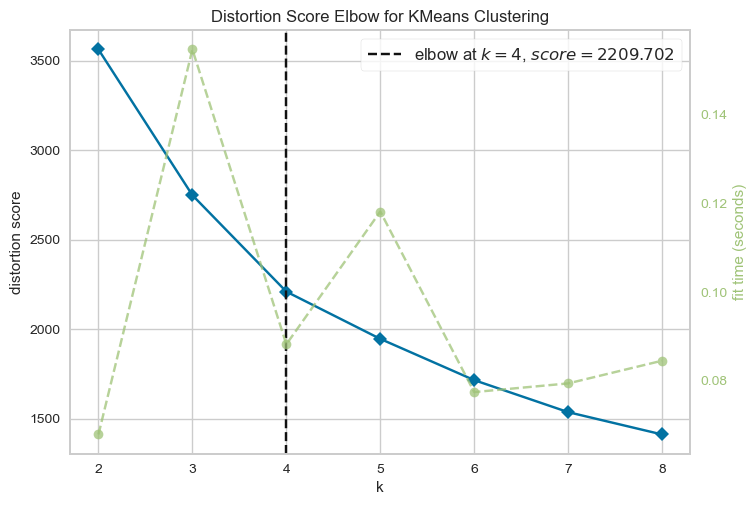

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [51]:
visualizer = KElbowVisualizer(km, k=(2,9))

visualizer.fit(reduced_drivers)
visualizer.poof()

#### For both k = 3, 4, and 5 there is a change in the line's direction. The strongest one at k = 4, a little elbow. Of these, fitting time is the lowest for k = 3, slightly below k = 4, with the highest for k = 5. I choose 4, because of the elbow, medium fitting time, and less plots split in minus and plus for the silhouette score. 

<div style="background-color:#ADD8E6">
<h3> 6. Final Model </h3>
<p> I run KMeans with 4 clusters on the scaled dataset reduced by PCA. </p>

In [52]:
km = KMeans(n_clusters=4, random_state=42)
km.fit(reduced_drivers)
clusters = km.predict(reduced_drivers)

In [53]:
# adding the clusters, the columns defining the reference location and the drivers into a dataframe, decoding categorical columns    
new_columns = {
    'county': data_cleaned['county'], 
    'sub-county': data_cleaned['sub-county'], 
    'households_in_location': data_cleaned['households_in_location'],
    'cluster': clusters
}

for col_name, col_data in new_columns.items():
    drivers.insert(0, col_name, col_data)

for col in cat_cols:
    drivers[col] = encoders[col].inverse_transform(drivers[col])
    
drivers.head()

,cluster,households_in_location,sub-county,county,1st_reason_for_departure,2nd_reason_for_departure,3rd_reason_for_departure,1st_reason_to_drop,2nd_reason_to_drop,3rd_reason_to_drop,1st_reason_for_departure_from_origin,2nd_reason_for_departure_from_origin,3rd_reason_for_departure_from_origin,1st_reason_for_returning,2nd_reason_for_returning,1st_challenge,2nd_challenge,3rd_challenge,1st_health_concern,2nd_health_concern,3rd_health_concern,safety_concerns,educational_facility,functional_watersources,watersource_distance,water_queue_time,percent_drinkingwater_access,percent_cookingwater_access
508,0,230,Balambala,Garissa,Drought,Resource-Based Conflict,Resource-Based Conflict,Drought,Resource-Based Conflict,Banditry,Drought,Resource-Based Conflict,Ethnic Clashes,Drought,Resource-Based Conflict,Resource Based Conflict,Lack Of Food And Water,Safety And Security,Diarrhea,Malaria,Typhoid,Weather,Yes,2,50,26,25,25
509,0,35,Balambala,Garissa,Drought,Resource-Based Conflict,Flash Floods Or Seasonal Floods,Drought,Resource-Based Conflict,Lack Of Water And Pasture,Drought,Resource-Based Conflict,Resource-Based Conflict,Drought,Resource-Based Conflict,Loss Of Livelihood,Lack Of Food And Water,Lack Of Access To Essential Services,Other,Acute Malnutrition,Diarrhea,Other,No,1,26,26,50,50
510,0,400,Ijara,Garissa,Drought,Resource-Based Conflict,Flash Floods Or Seasonal Floods,Drought,Resource-Based Conflict,Resource-Based Conflict,Drought,Resource-Based Conflict,Ethnic Clashes,Drought,Resource-Based Conflict,Loss Of Livelihood,Lack Of Food And Water,Lack Of Access To Essential Services,Other,Pneumonia,Amoeba,Other,No,1,26,26,50,50
511,0,200,Fafi,Garissa,Drought,Resource-Based Conflict,Flash Floods Or Seasonal Floods,Drought,Resource-Based Conflict,Flash Floods Or Seasonal Floods,Drought,Resource-Based Conflict,Flash Floods Or Seasonal Floods,Drought,Resource-Based Conflict,Loss Of Livelihood,Environmental Challenges,Lack Of Food And Water,Malaria,Measles,Diarrhea,Weather,Yes,1,38,26,75,50
512,0,200,Fafi,Garissa,Drought,Resource-Based Conflict,Flash Floods Or Seasonal Floods,Drought,Resource-Based Conflict,Flash Floods Or Seasonal Floods,Drought,Resource-Based Conflict,Flash Floods Or Seasonal Floods,Drought,Resource-Based Conflict,Loss Of Livelihood,Safety And Security,Environmental Challenges,Malaria,Pneumonia,Typhoid,Weather,Yes,1,50,50,75,75


<div style="background-color:#ADD8E6">
<h3> 7. Results </h3>
<p> I want to find those features that appear to be the strongest drivers for mobility in the region. </p>

In [54]:
pca.components_

array([[-0.00195689, -0.02733617, -0.08941234,  0.05227073,  0.03137113,
         0.01687324,  0.02054669, -0.11035016,  0.08458124, -0.0478113 ,
        -0.10061813, -0.04610214, -0.01768098, -0.05907981, -0.0352636 ,
        -0.00347299, -0.00738893, -0.14631202, -0.03477632,  0.18790819,
        -0.37389309, -0.34941803,  0.5576551 ,  0.56307823],
       [ 0.19262737, -0.35776802, -0.07981942, -0.1544148 , -0.26996223,
        -0.18687583,  0.20490395, -0.28900222, -0.15644766,  0.43967048,
        -0.07032074, -0.31857477,  0.20189191, -0.03795641, -0.0673855 ,
         0.10710362, -0.19458228, -0.25247667,  0.27246328,  0.05279245,
        -0.04717877,  0.04037086, -0.06049262, -0.05284557],
       [ 0.354976  , -0.20594668,  0.06368956, -0.18863675, -0.07382667,
        -0.01337909, -0.02182651, -0.00429706, -0.20575593,  0.03633751,
         0.08245656,  0.41731403, -0.50356225,  0.36451542,  0.09934104,
         0.13879958, -0.10447298, -0.14070187, -0.11649444, -0.23504064,
  

If a feature has a high absolute weight in a PC, that means changes in that feature are associated with large movements along that PC. In other words, that feature contributes significantly to the variance explained by that PC. If a feature has a high absolute weight in many PCs, it can be interpreted as an important feature in the dataset.

In the first PC, the last two features have weights 0.531382 and 0.527717, which are the largest in absolute value. This means that these two features contribute most to the variance along the first PC.

In the second PC, the features 2 and 10 have the highest absolute weights (0.394364 and 0.364280), so they contribute the most to the variance along the second PC.

Similarly, for the third PC, the 12th and 13th features have the highest absolute weights (0.520345 and 0.587787), meaning they contribute the most to the variance along the third PC.

In [55]:
# looking at the loadings for each PC in order to determine their weight of each feature on that component
features = cat_cols + num_cols
components_df = pd.DataFrame(pca.components_, columns=features)
components_df

,1st_reason_for_departure,2nd_reason_for_departure,3rd_reason_for_departure,1st_reason_to_drop,2nd_reason_to_drop,3rd_reason_to_drop,1st_reason_for_departure_from_origin,2nd_reason_for_departure_from_origin,3rd_reason_for_departure_from_origin,1st_reason_for_returning,2nd_reason_for_returning,1st_challenge,2nd_challenge,3rd_challenge,1st_health_concern,2nd_health_concern,3rd_health_concern,safety_concerns,educational_facility,functional_watersources,watersource_distance,water_queue_time,percent_drinkingwater_access,percent_cookingwater_access
0,-0.001957,-0.027336,-0.089412,0.052271,0.031371,0.016873,0.020547,-0.110350,0.084581,-0.047811,-0.100618,-0.046102,-0.017681,-0.059080,-0.035264,-0.003473,-0.007389,-0.146312,-0.034776,0.187908,-0.373893,-0.349418,0.557655,0.563078
1,0.192627,-0.357768,-0.079819,-0.154415,-0.269962,-0.186876,0.204904,-0.289002,-0.156448,0.439670,-0.070321,-0.318575,0.201892,-0.037956,-0.067385,0.107104,-0.194582,-0.252477,0.272463,0.052792,-0.047179,0.040371,-0.060493,-0.052846
2,0.354976,-0.205947,0.063690,-0.188637,-0.073827,-0.013379,-0.021827,-0.004297,-0.205756,0.036338,0.082457,0.417314,-0.503562,0.364515,0.099341,0.138800,-0.104473,-0.140702,-0.116494,-0.235041,-0.131108,-0.165303,-0.036615,0.015671


In [56]:
# considering the explained variance of each component, so that more important components (those explaining more variance) have a bigger influence on the final score
explained_variance_ratios = pca.explained_variance_ratio_

In [57]:
# multiplying the weights by the explained variance ratio of each component before summing up and sorting
weighted_components = components_df.mul(explained_variance_ratios, axis=0)
summed_weighted_scores = weighted_components.abs().sum(axis=0)
top_10_features = summed_weighted_scores.sort_values(ascending=False).head(10)
top_10_features

percent_drinkingwater_access    0.061579
percent_cookingwater_access     0.060171
1st_challenge                   0.056001
2nd_challenge                   0.049730
watersource_distance            0.048649
water_queue_time                0.047927
2nd_reason_for_departure        0.043613
safety_concerns                 0.042903
1st_reason_for_returning        0.041055
1st_reason_for_departure        0.037924
dtype: float64

Concentrating on the 10 most influencing features, I determine, which category is the dominant one in each.

In [58]:
for col in cat_cols:
    data_cleaned[col] = encoders[col].inverse_transform(data_cleaned[col])

def value_counts_for_features(data_cleaned, features):
    for feature in features:
        print(f"Feature: {feature}")
        print(data_cleaned[feature].value_counts())
        print("--------------------")

features = ['percent_drinkingwater_access',
            'percent_cookingwater_access',
            'watersource_distance',
            'water_queue_time',
            '2nd_reason_to_drop',
            '2nd_challenge',
            '1st_reason_for_departure',
            '2nd_reason_for_departure',
            '1st_reason_for_returning',
            '1st_challenge']

value_counts_for_features(data_cleaned, features)

Feature: percent_drinkingwater_access
25     281
75     227
50     208
100    105
0       40
Name: percent_drinkingwater_access, dtype: int64
--------------------
Feature: percent_cookingwater_access
25     289
50     274
75     173
100     82
0       43
Name: percent_cookingwater_access, dtype: int64
--------------------
Feature: watersource_distance
50    416
38    195
10    150
26    100
Name: watersource_distance, dtype: int64
--------------------
Feature: water_queue_time
50    327
10    258
26    177
38     99
Name: water_queue_time, dtype: int64
--------------------
Feature: 2nd_reason_to_drop
Resource-Based Conflict            294
Lack Of Water And Pasture          211
Animal Disease                     151
Banditry                           113
Drought                             76
Flash Floods Or Seasonal Floods     15
Fires                                1
Name: 2nd_reason_to_drop, dtype: int64
--------------------
Feature: 2nd_challenge
Lack Of Food And Water              

<div style="background-color:#AFEEEE">
<h3> Summary of the Top 10 Features </h3> <br>
    

1. **Percent of Drinking Water Access**: A significant number of locations have limited access to drinking water. In 296 areas, only 25% of the population have drinking water access, whereas in 234 areas, 75% of the population have access. In contrast, only 34 areas reported zero access.

2. **Percent of Cooking Water Access**: The situation is similarly concerning regarding access to cooking water. In 308 areas, just 25% of the population have access, with 209 locations reporting a 75% access rate. Meanwhile, 33 areas reported no access to cooking water.

3. **Water Source Distance**: It is noteworthy that the distance to a water source is considerable in many areas, with 404 locations reporting an average travel distance of 50 units (likely minutes or miles) to reach the nearest source.

4. **Water Queue Time**: The time spent queuing for water access is also significant, with 326 areas reporting a 50-unit average wait time, possibly indicating a scarcity of water sources and higher demand.

5. **2nd Reason to Drop Pastoralism**: The reason for abandoning pastoralism reveals vital information about regional issues. The leading reason in 297 areas is 'Resource-Based Conflict', followed by 'Lack Of Water And Pasture' in 203 areas.

6. **2nd Challenge**: The second most reported challenge across locations is 'Lack Of Food And Water' (269 areas), suggesting issues of food and water scarcity are prevalent. Safety and security, reported in 196 locations, may also be indirectly tied to resource scarcity leading to conflicts.

7. **1st Reason for Departure**: 'Drought' is a dominant reason for departure from locations, reported in a significant 793 areas. This further emphasizes the critical role of water availability in these communities.

8. **2nd Reason for Departure**: The second most common reason for departure, 'Resource-Based Conflict' (669 areas), indicates significant struggles over resources, likely including water.

9. **1st Reason for Returning**: The primary reason for returning to their original locations reported in 381 areas is 'Drought', indicating a severe lack of water sources in the areas they moved to.

10. **1st Challenge**: Environmental challenges are the primary concerns in 474 areas, which likely include issues related to water availability and quality.

In summary, the most impactful features, based on their weights in the first three principal components, highlight water accessibility, both for drinking and cooking, as well as the broader challenges that water scarcity can present, such as drought, resource-based conflicts, and abandonment of traditional livelihoods like pastoralism.

Based on the current analysis, all of the 10 features can be directly or indirectly associated with water scarcity under certain conditions. <br>
**Hence, 100% of the factors can be linked to water scarcity.**

Features such as ethnic clashes, safety concerns or access to an educational facility appear to be less important drivers for mobility in the region. However, a more detailed analysis e.g. of additional features in the dataset could provide a more accurate picture of the individual motivation for mobility at a specific point in time. It can help to better understand the underlying causes of these issues and suggest effective interventions.
</div>
